# Desafio final - CNN (Tumor cerebral)
O dataset disponibilizado é uma lista de ressonâncias magnéticas. [CLIQUE AQUI ](https://drive.google.com/drive/folders/1NTjXtD7LY1WS5ZFKcISeS2A9wisarcYV?usp=sharing) para acessar o drive com o dataset

O objetivo do desafio é construir uma CNN (Convolutional Neural Network) para predizer se é encontrado um tumor cerebral ou não com acurácia **maior do que 95%** no set de **validação**.

Obs: Todas as imagens do set são do tamanho 256 x 256, RGB (coloridas)

Para fins de organização nomeie o seu notebook como: ***[NOME-SOBRENOME]-DF-IA-VNW***, como exemplo:
`SAMUEL-SILVERIO-DF-IA-VNW`.

Fica a critério do aluno decidir:
- Quantidade de camadas convolucionais
- Quantidade de filtros em cada camada convolucional
- Quantidade de camadas ocultas na dense layer
- Funções de ativação
- Função de saída
- Quantidade de neurônios
- Compilação do modelo

## O que deve ser fornecido:
- Print do gráfico de acurácia
- Print da matriz de confusão
- O modelo salvo e entregue na plataforma
- O modelo salvo e compartilhado no seguinte drive: [Link do drive](https://drive.google.com/drive/folders/1_26I0xWzbeDaOTXd6P8METEUciYfOREx?usp=sharing)
- A entrega no drive tem que ser feita com o mesmo nome do notebook:**[NOME-SOBRENOME]-DF-IA-VNW.keras**, como exemplo:
`SAMUEL-SILVERIO-DF-IA-VNW.keras`.



# Prazo:
A entrega deve ser feita até o dia 10/07/2025 às 12h na plataforma E no drive.

⚠ A entrega é muito importante para que você receba o certificado de conclusão.

In [26]:
import zipfile

path_to_zip_file = '/content/Brain_Tumor_v2.zip'
directory_to_extract_to = '/content/extracted_data/'

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [18]:
import tensorflow as tf
import os

In [27]:
BATCH_SIZE = 64

IMG_SIZE = (256, 256)

val = 0.2

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/extracted_data/Data",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    validation_split=val,
    subset="training",
    #shuffle=False,
    seed=150
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/extracted_data/Data",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",
    validation_split=val,
    subset="validation",
    seed=150
)

Found 3096 files belonging to 2 classes.
Using 2477 files for training.
Found 3096 files belonging to 2 classes.
Using 619 files for validation.


In [20]:
class_names = train_ds.class_names

In [6]:
print(class_names)

['No', 'Yes']


In [28]:
train_ds = (
    train_ds.shuffle(1000)
)
val_ds = (
    val_ds.shuffle(1000)
  )

In [41]:
regularizer = tf.keras.regularizers.L2(0.01)

In [42]:
# TODO: AQUI VOCE DEVE COMPILAR SEU MODELO
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    # Camada criação de imagens
    tf.keras.layers.RandomContrast(0.2),
    # Camada de entrada, imagem de pixels x 3 cores
    tf.keras.layers.Conv2D(16, 3, activation='relu', kernel_regularizer= regularizer),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_contrast_8               │ (None, 256, 256, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 84, 84, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 82, 82, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 23328)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │       746,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 751,649 (2.87 MB)

 Trainable params: 751,649 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Verifica se existe uma GPU disponível
print("GPU disponível:", tf.config.list_physical_devices('GPU'))
# Verifica se a GPU poderá ser utiilizada
print("Executando em GPU?" , tf.config.list_logical_devices('GPU'))


GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Executando em GPU? [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [43]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.7123 - loss: 27.3007 - val_accuracy: 0.8627 - val_loss: 0.5535
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8574 - loss: 0.5163 - val_accuracy: 0.8627 - val_loss: 0.3351
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8606 - loss: 0.2605 - val_accuracy: 0.8627 - val_loss: 0.2268
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8584 - loss: 0.1932 - val_accuracy: 0.8627 - val_loss: 0.2094
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8617 - loss: 0.1732 - val_accuracy: 0.8627 - val_loss: 0.2132
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9458 - loss: 0.1651 - val_accuracy: 0.9532 - val_loss: 0.2193
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9771 - loss: 0.1608 - val_accuracy: 0.9532 - val_loss: 0.2369
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9829 - loss: 0.1523 - val_accuracy: 0.9580 -

In [44]:
import matplotlib.pyplot as plt

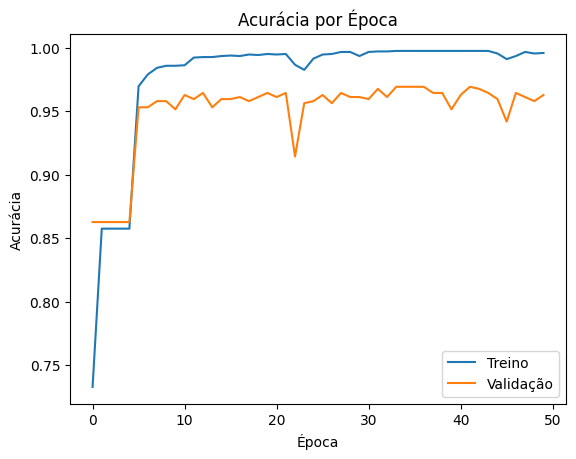

In [45]:
# Gráfico de histórico de acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

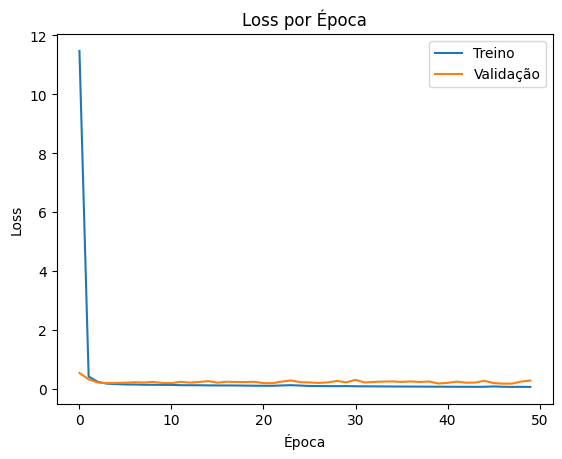

In [46]:
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Obtendo predições

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [47]:
y_pred = []
y_true = []

for x_batch, y_batch in val_ds:
    preds = model.predict(x_batch)
    y_pred.extend((preds > 0.5).astype(int).flatten())
    y_true.extend(y_batch.numpy().astype(int).flatten())


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


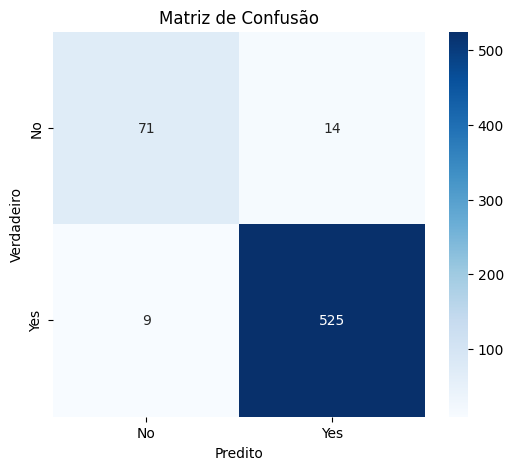

In [48]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()